In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv("data/consommation-quotidienne-brute-regionale.csv", sep=";")

In [65]:
df

,date_heure,date,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale
0,2013-01-21T09:00:00+01:00,2013-01-21,09:00,11,Île-de-France,4129.0,Définitif,NaN,NaN,4129.0,13610,Définitif,17739.0
1,2013-01-21T09:00:00+01:00,2013-01-21,09:00,24,Centre-Val de Loire,4871.0,Définitif,NaN,NaN,4871.0,3589,Définitif,8460.0
2,2013-01-21T09:00:00+01:00,2013-01-21,09:00,44,Grand Est,17598.0,Définitif,NaN,NaN,17598.0,7306,Définitif,24904.0
3,2013-01-21T09:00:00+01:00,2013-01-21,09:00,76,Occitanie,2036.0,Définitif,4376.0,Définitif,6412.0,6722,Définitif,13134.0
4,2013-01-21T09:00:00+01:00,2013-01-21,09:00,84,Auvergne-Rhône-Alpes,14353.0,Définitif,94.0,Définitif,14447.0,10986,Définitif,25433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207791,2023-06-23T13:00:00+02:00,2023-06-23,13:00,76,Occitanie,281.0,Meilleur Statut,570.0,Définitif,851.0,4041,Consolidé,4892.0
2207792,2023-06-23T13:30:00+02:00,2023-06-23,13:30,24,Centre-Val de Loire,NaN,NaN,NaN,NaN,NaN,1761,Consolidé,NaN
2207793,2023-06-23T14:00:00+02:00,2023-06-23,14:00,44,Grand Est,3552.0,Meilleur Statut,NaN,NaN,3552.0,4548,Consolidé,8100.0
2207794,2023-06-23T14:00:00+02:00,2023-06-23,14:00,52,Pays de la Loire,778.0,Meilleur Statut,NaN,NaN,778.0,2778,Consolidé,3556.0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207796 entries, 0 to 2207795
Data columns (total 13 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   date_heure                          object 
 1   date                                object 
 2   heure                               object 
 3   code_insee_region                   int64  
 4   region                              object 
 5   consommation_brute_gaz_grtgaz       float64
 6   statut_grtgaz                       object 
 7   consommation_brute_gaz_terega       float64
 8   statut_terega                       object 
 9   consommation_brute_gaz_totale       float64
 10  consommation_brute_electricite_rte  int64  
 11  statut_rte                          object 
 12  consommation_brute_totale           float64
dtypes: float64(4), int64(2), object(7)
memory usage: 219.0+ MB



    1. A l’aide de pandas et matplotlib, affichez la série temporelle en utilisant comme abscisse la date_heure.

In [67]:
df = df.sort_values('date_heure')
df

,date_heure,date,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale
1241993,2013-01-01T00:30:00+01:00,2013-01-01,00:30,27,Bourgogne-Franche-Comté,NaN,NaN,NaN,NaN,NaN,2357,Définitif,NaN
317178,2013-01-01T00:30:00+01:00,2013-01-01,00:30,76,Occitanie,NaN,NaN,NaN,NaN,NaN,5228,Définitif,NaN
317168,2013-01-01T00:30:00+01:00,2013-01-01,00:30,11,Île-de-France,NaN,NaN,NaN,NaN,NaN,9134,Définitif,NaN
1257651,2013-01-01T00:30:00+01:00,2013-01-01,00:30,93,Provence-Alpes-Côte d'Azur,NaN,NaN,NaN,NaN,NaN,5570,Définitif,NaN
1245620,2013-01-01T00:30:00+01:00,2013-01-01,00:30,84,Auvergne-Rhône-Alpes,NaN,NaN,NaN,NaN,NaN,8173,Définitif,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041239,2023-06-30T23:30:00+02:00,2023-06-30,23:30,52,Pays de la Loire,NaN,NaN,NaN,NaN,NaN,2443,Consolidé,NaN
2041234,2023-06-30T23:30:00+02:00,2023-06-30,23:30,28,Normandie,NaN,NaN,NaN,NaN,NaN,2787,Consolidé,NaN
2041229,2023-06-30T23:30:00+02:00,2023-06-30,23:30,24,Centre-Val de Loire,NaN,NaN,NaN,NaN,NaN,1609,Consolidé,NaN
2195358,2023-06-30T23:30:00+02:00,2023-06-30,23:30,53,Bretagne,NaN,NaN,NaN,NaN,NaN,2302,Consolidé,NaN


In [68]:
df['date_heure'] = pd.to_datetime(df['date_heure'], utc=True)

In [69]:
df_hdf = df[df['region'] == 'Hauts-de-France']

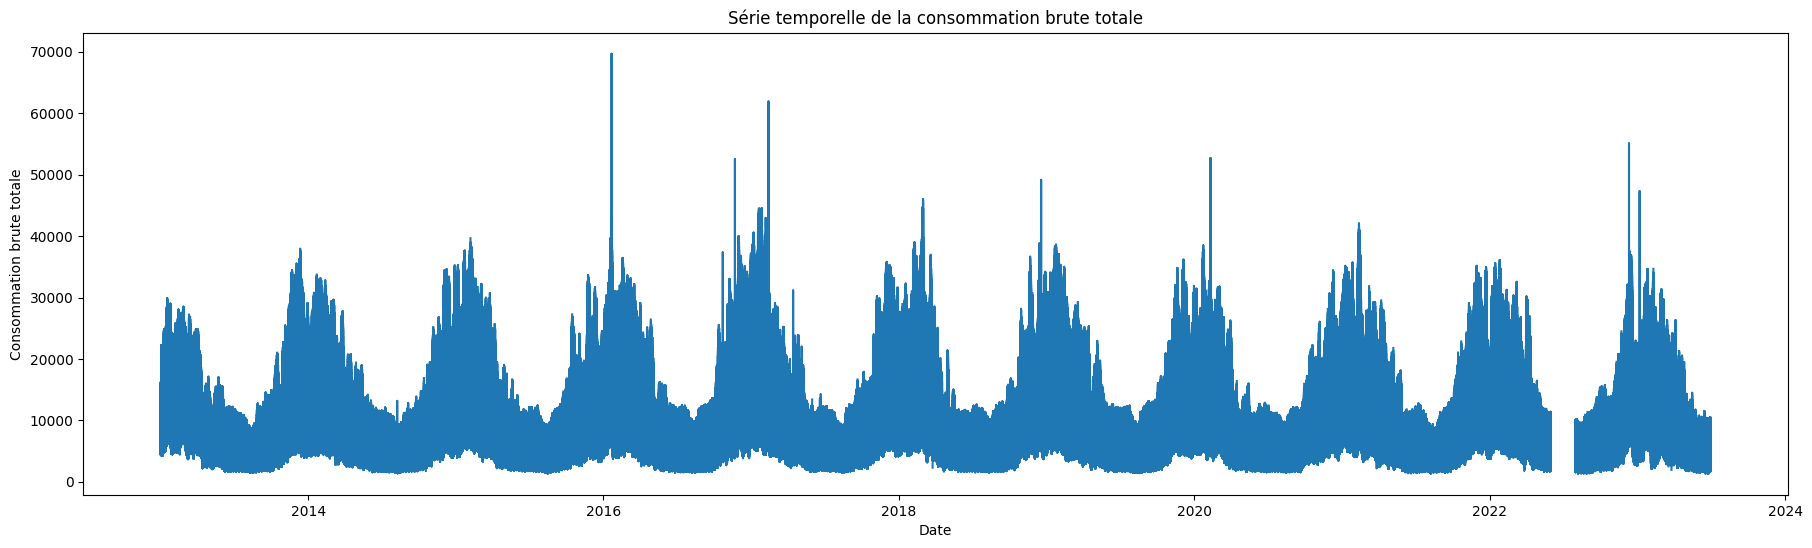

In [151]:
plt.figure(figsize=(22, 6))
plt.plot(df['date_heure'], df['consommation_brute_totale'])
plt.xlabel('Date')
plt.ylabel('Consommation brute totale')
plt.title('Série temporelle de la consommation brute totale')
plt.show()


    2. Affichez cette même série temporelle en rassemblant:
        1. Par année
        2. Par trimestre
        3. Par mois
        4. Par semaine
        5. Par jour

/tmp/ipykernel_139458/4175061535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdf['annee'] = df_hdf['date_heure'].dt.year


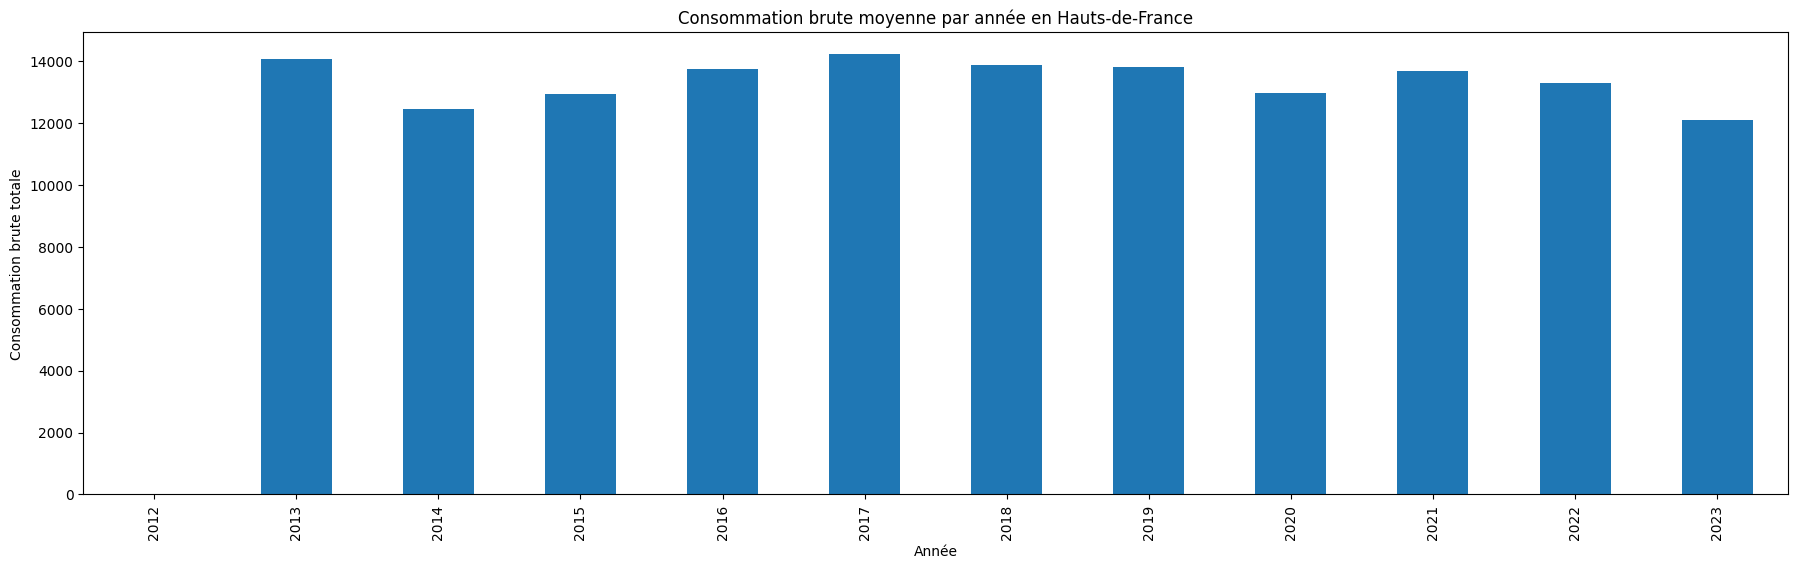

In [132]:
df_hdf['annee'] = df_hdf['date_heure'].dt.year
df_annee_hdf = df_hdf.groupby('annee')['consommation_brute_totale'].mean()

plt.figure(figsize=(22, 6))
df_annee_hdf.plot(kind='bar')
plt.xlabel('Année')
plt.ylabel('Consommation brute totale')
plt.title('Consommation brute moyenne par année en Hauts-de-France')
plt.show()

/tmp/ipykernel_139458/2138815874.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_hdf['trimestre'] = df_hdf['date_heure'].dt.to_period("Q")
/tmp/ipykernel_139458/2138815874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdf['trimestre'] = df_hdf['date_heure'].dt.to_period("Q")


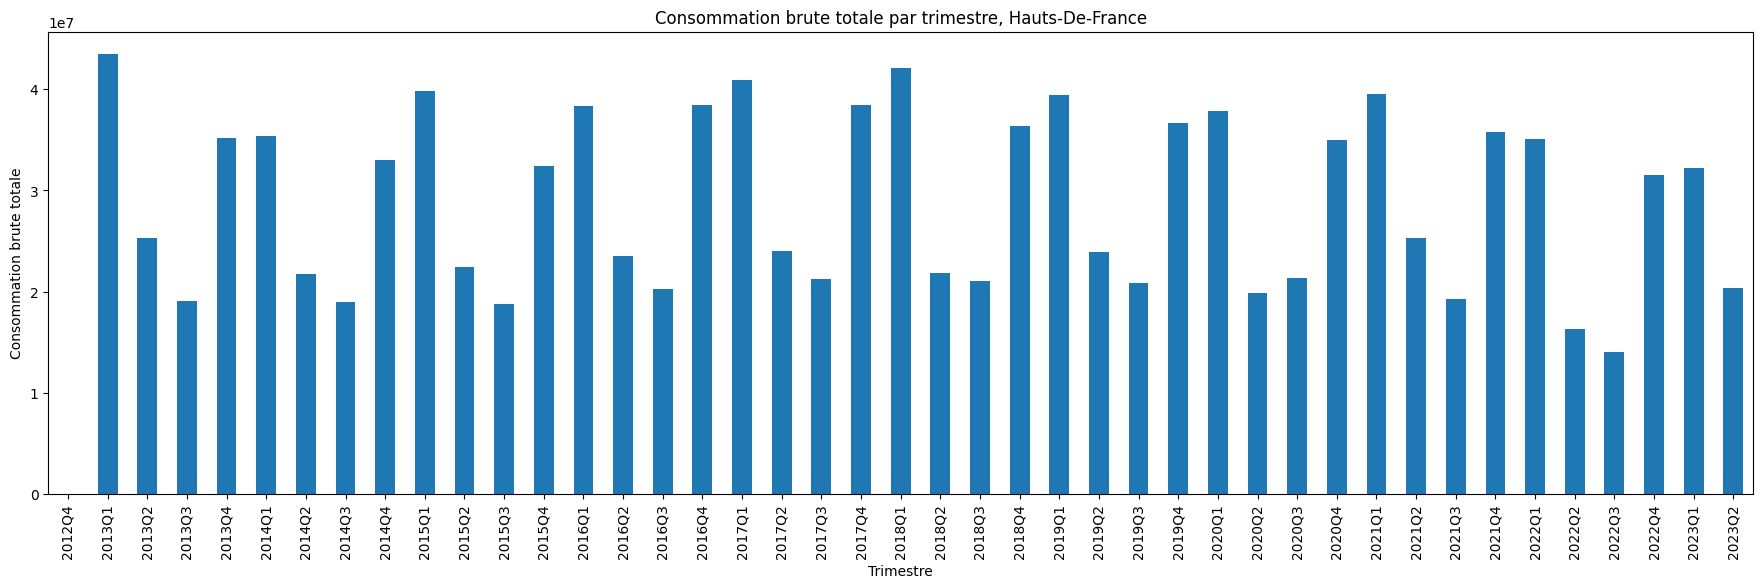

In [134]:
df_hdf['trimestre'] = df_hdf['date_heure'].dt.to_period("Q")
df_trimestre = df_hdf.groupby('trimestre')['consommation_brute_totale'].sum()

plt.figure(figsize=(22, 6))
df_trimestre.plot(kind='bar')
plt.xlabel('Trimestre')
plt.ylabel('Consommation brute totale')
plt.title('Consommation brute totale par trimestre, Hauts-De-France')
plt.show()


/tmp/ipykernel_139458/747771843.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_hdf['mois'] = df_hdf['date_heure'].dt.to_period("M")
/tmp/ipykernel_139458/747771843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdf['mois'] = df_hdf['date_heure'].dt.to_period("M")


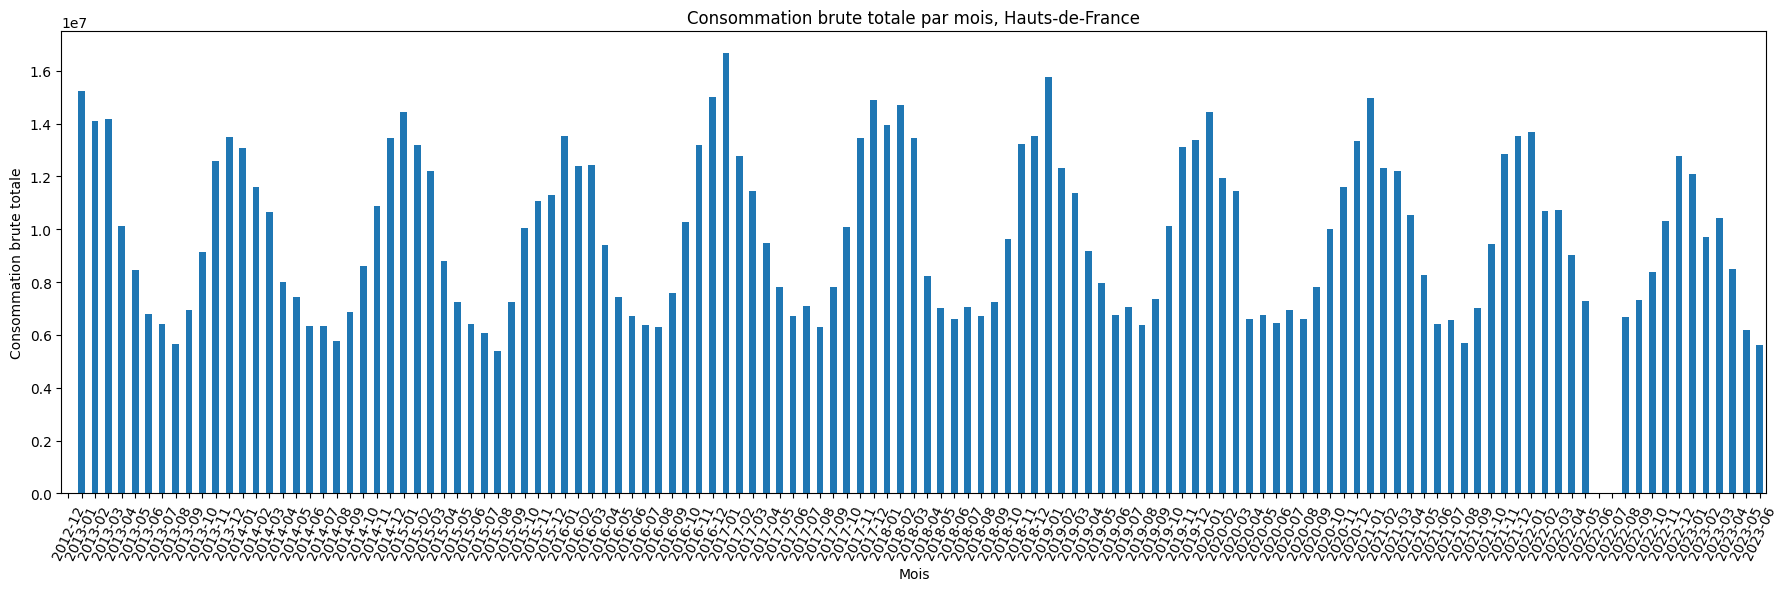

In [160]:
df_hdf['mois'] = df_hdf['date_heure'].dt.to_period("M")
df_mois = df_hdf.groupby('mois')['consommation_brute_totale'].sum()

plt.figure(figsize=(22, 6))
df_mois.plot(kind='bar')
plt.xlabel('Mois')
plt.ylabel('Consommation brute totale')
plt.title('Consommation brute totale par mois, Hauts-de-France')
plt.xticks(rotation=65)
plt.show()


/tmp/ipykernel_139458/3124437217.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_hdf['semaine'] = df_hdf['date_heure'].dt.to_period("W")
/tmp/ipykernel_139458/3124437217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdf['semaine'] = df_hdf['date_heure'].dt.to_period("W")


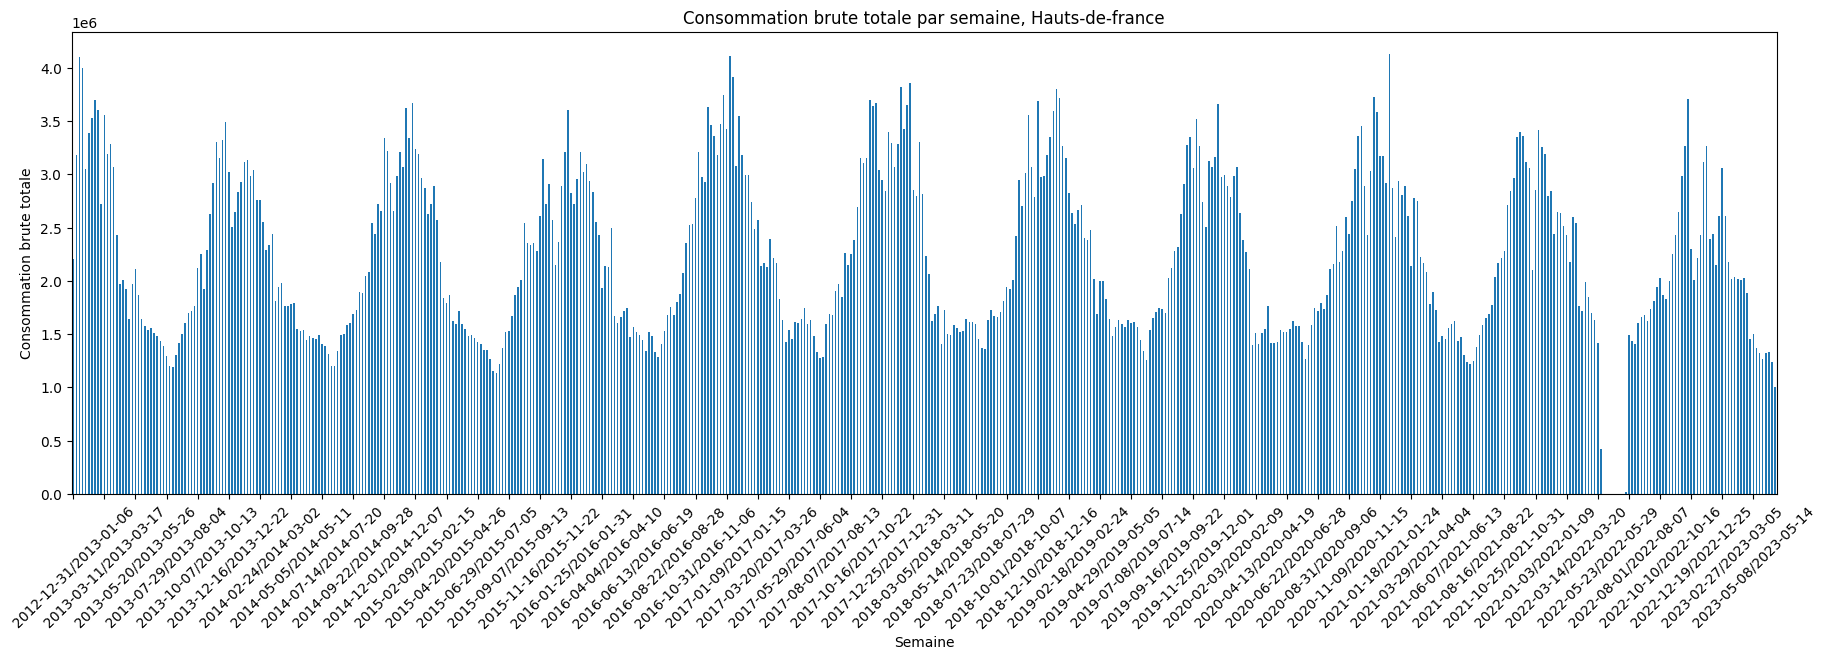

In [136]:
df_hdf['semaine'] = df_hdf['date_heure'].dt.to_period("W")
df_semaine = df_hdf.groupby('semaine')['consommation_brute_totale'].sum()

plt.figure(figsize=(22, 6))
df_semaine.plot(kind='bar')
plt.xlabel('Semaine')
plt.ylabel('Consommation brute totale')
plt.title('Consommation brute totale par semaine, Hauts-de-france')
plt.xticks(ticks=[i for i in range(0, len(df_semaine), 10)], 
           labels=[str(index) for i, index in enumerate(df_semaine.index) if i % 10 == 0], 
           rotation=45)
plt.show()


/tmp/ipykernel_139458/1051762369.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_hdf['jour'] = df_hdf['date_heure'].dt.to_period("D")
/tmp/ipykernel_139458/1051762369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdf['jour'] = df_hdf['date_heure'].dt.to_period("D")


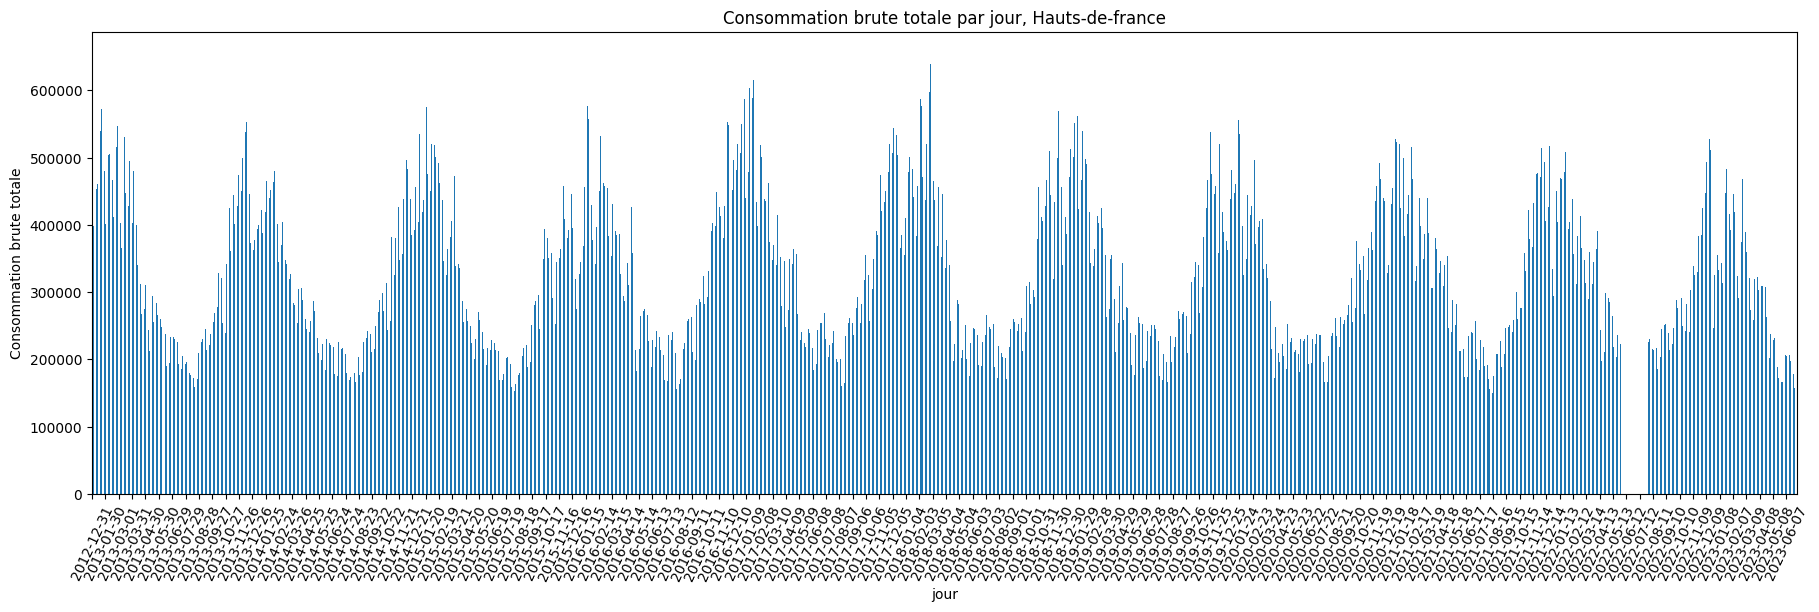

In [158]:
df_hdf['jour'] = df_hdf['date_heure'].dt.to_period("D")
df_jour = df_hdf.groupby('jour')['consommation_brute_totale'].sum()

plt.figure(figsize=(22, 6))
df_jour.plot(kind='bar')
plt.xlabel('jour')
plt.ylabel('Consommation brute totale')
plt.title('Consommation brute totale par jour, Hauts-de-france')
plt.xticks(ticks=[i for i in range(0, len(df_jour), 30)], 
           labels=[str(index) for i, index in enumerate(df_jour.index) if i % 30 == 0], 
           rotation=65)
plt.show()


         
    3. A partir de la time série agrégée à la journée, créez une moyenne mobile sur une semaine, centrée et symétrique.

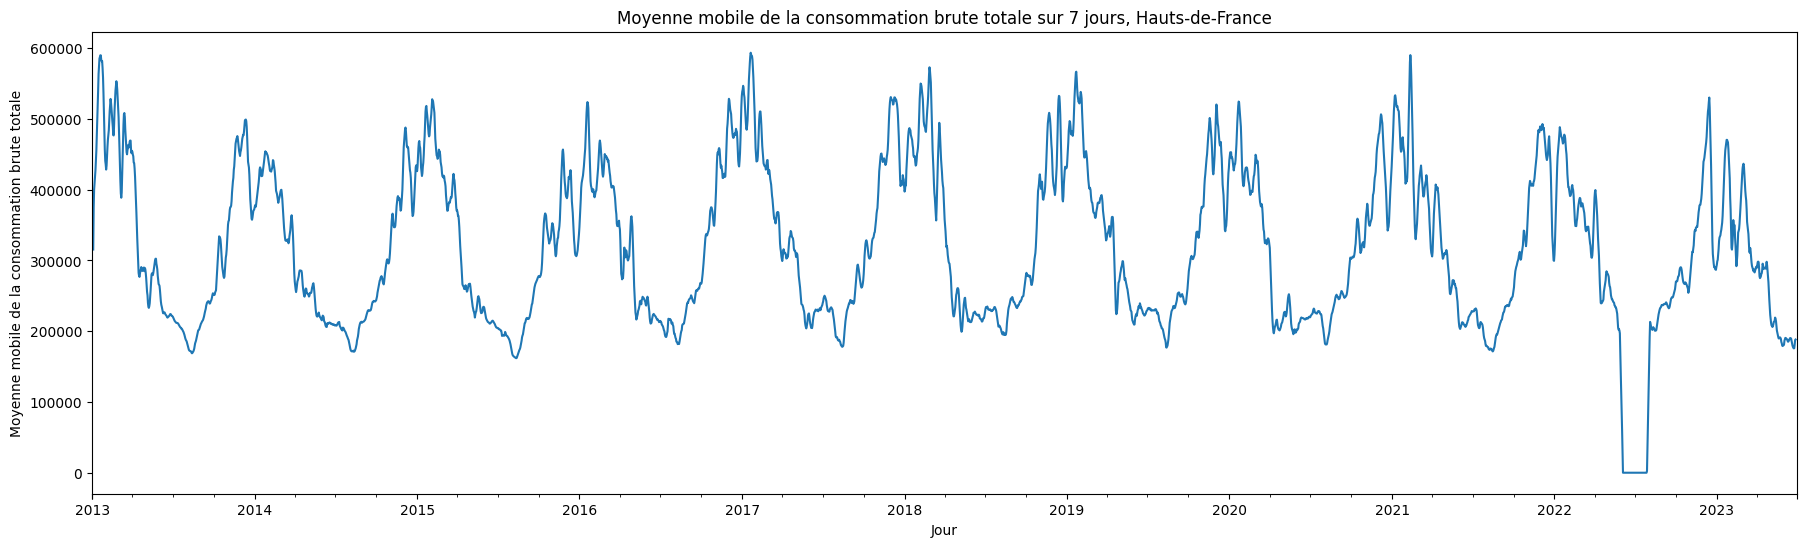

In [110]:
moyenne_mobile = df_jour.rolling(window=7, center=True).mean()

plt.figure(figsize=(22, 6))
moyenne_mobile.plot()
plt.xlabel('Jour')
plt.ylabel('Moyenne mobile de la consommation brute totale')
plt.title('Moyenne mobile de la consommation brute totale sur 7 jours, Hauts-de-France')
plt.show()


     
    4. Quelle est la différence entre la moyenne mobile et les agrégations précédentes?

    
     La différence entre une moyenne mobile et les méthodes d'agrégation précédentes (comme groupby().sum()) réside dans la manière dont les données sont résumées.
     
        Agrégations simples comme groupby().sum() :

    Les données sont regroupées en fonction d'une unité de temps particulière (année, mois, semaine, jour, etc.) et ensuite sommées (ou moyennées, ou min/max, etc.) au sein de ces groupes.
    Chaque point de données dans le résultat représente toutes les observations incluses dans cet intervalle de temps.
    Cela peut masquer la variabilité à l'intérieur de ces intervalles.

        Moyenne mobile :

    Une moyenne mobile prend la moyenne des "n" points de données adjacents pour créer une nouvelle série.
    Cela "lisse" la série en minimisant les fluctuations de courte durée et en mettant en évidence les tendances à plus long terme.
    C'est un calcul itératif : à chaque nouvelle période, la moyenne mobile se met à jour en incluant la valeur la plus récente et en excluant la valeur la plus ancienne de la période.
    Une moyenne mobile centrée place le point moyen au centre de la fenêtre, ce qui permet de mieux représenter les tendances au moment "t" en utilisant des informations avant et après "t".

    En résumé, la moyenne mobile est utile pour lisser des données bruitées et mettre en évidence des tendances à long terme, tandis que les agrégations comme groupby().sum() sont plus utiles pour obtenir une valeur sommaire par unité de temps.

     
    5. A l’aide de box-plots, observez la saisonnalité:
        1. trimestrielle (chaque trimestre)
        2. mensuelle (chaque mois)
        3. hebdomadaire (chaque jour)
        4. journalière (chaque heure)

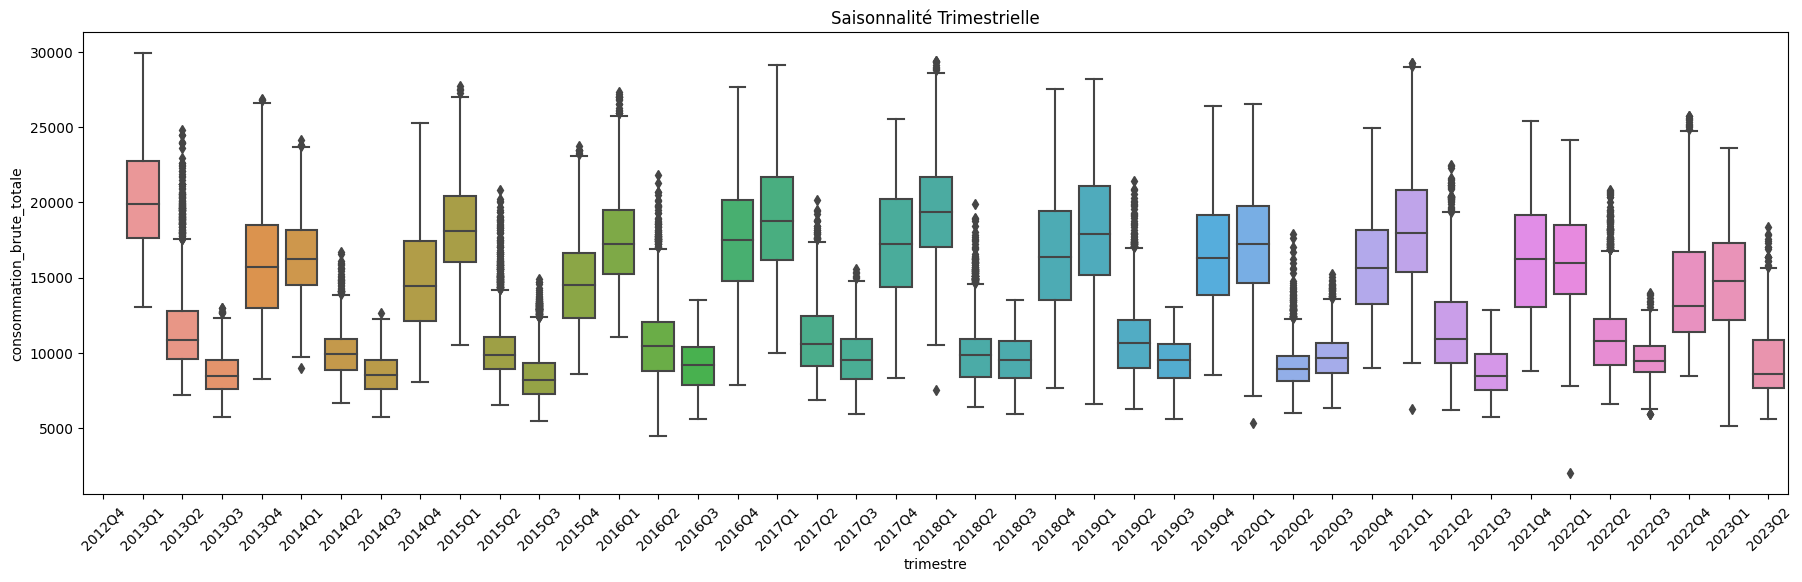

In [145]:
plt.figure(figsize=(22, 6))
sns.boxplot(data=df_hdf, x='trimestre', y='consommation_brute_totale')
plt.title('Saisonnalité Trimestrielle')
plt.xticks(rotation=45)
plt.show()


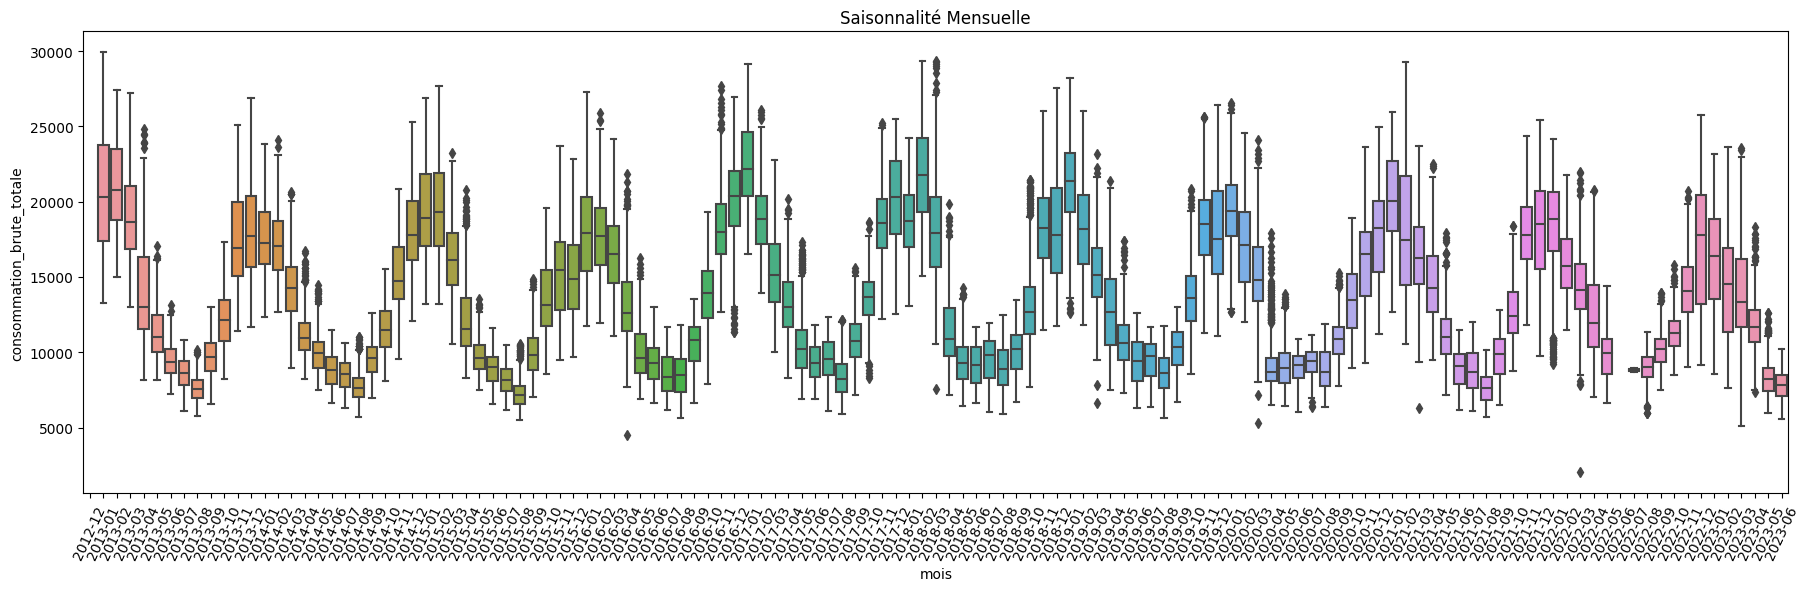

In [154]:
plt.figure(figsize=(22, 6))
sns.boxplot(data=df_hdf, x='mois', y='consommation_brute_totale')
plt.title('Saisonnalité Mensuelle')
plt.xticks(rotation=65)
plt.show()


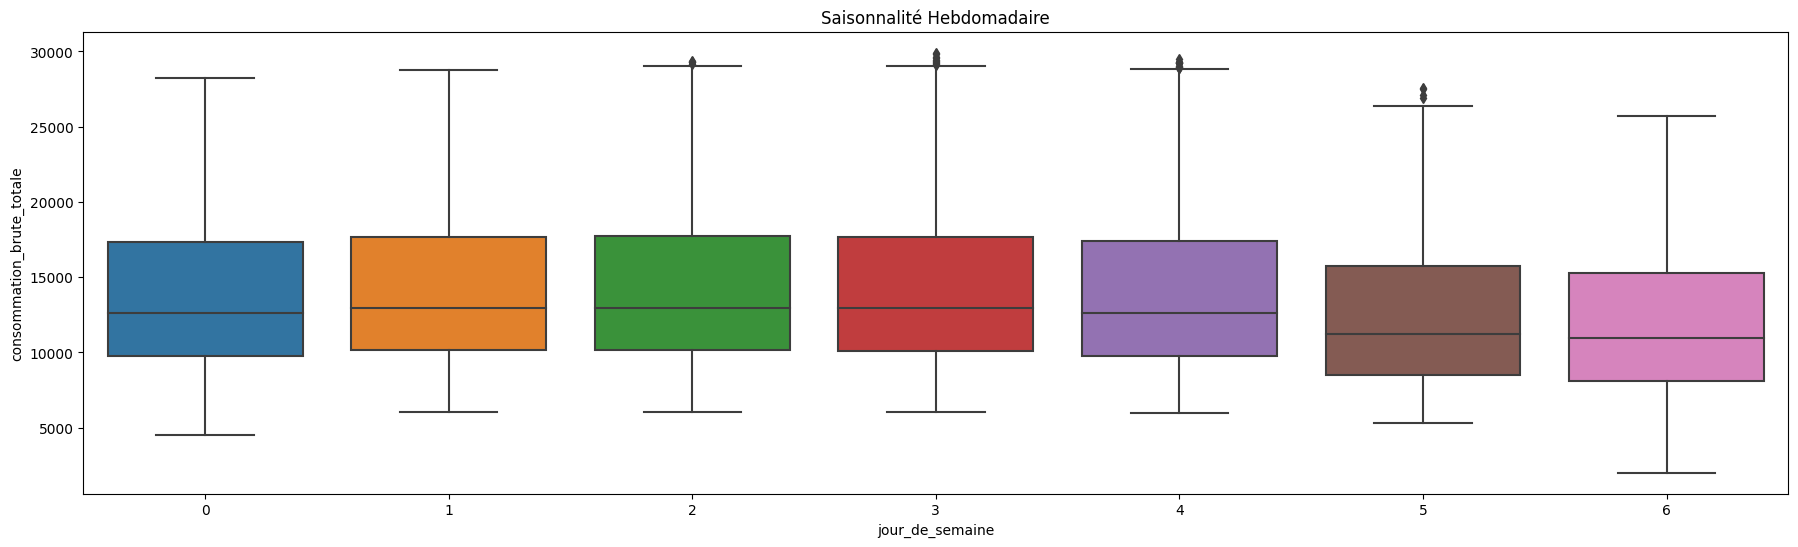

In [157]:
plt.figure(figsize=(22, 6))
sns.boxplot(data=df_hdf, x='jour_de_semaine', y='consommation_brute_totale')
plt.title('Saisonnalité Hebdomadaire')
plt.show()


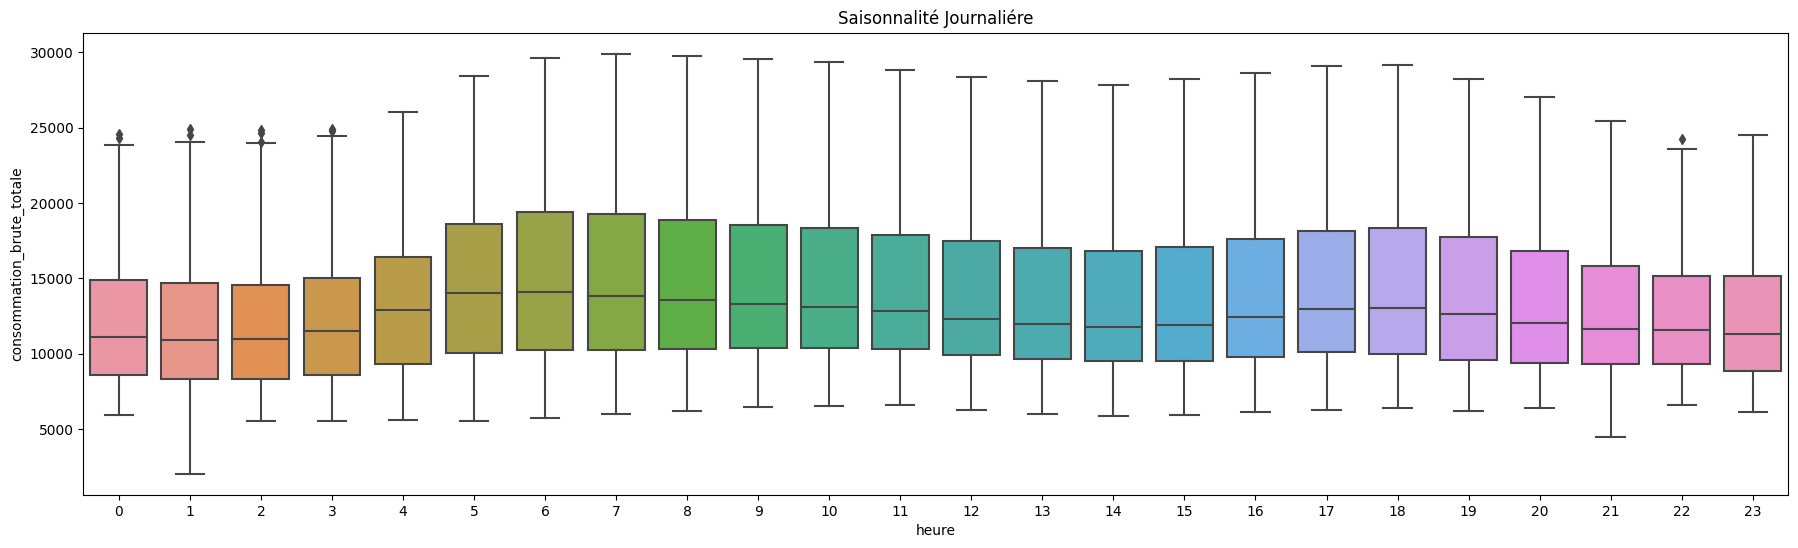

In [156]:
plt.figure(figsize=(22, 6))
sns.boxplot(data=df_hdf, x='heure', y='consommation_brute_totale')
plt.title('Saisonnalité Journaliére')
plt.show()